In [54]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df= pd.read_csv("/content/IMDB Dataset.csv")
df

,review,sentiment,id
0,One of the other reviewers has mentioned that ...,#VALUE!,2
1,A wonderful little production. <br /><br />The...,positive,3
2,I thought this was a wonderful way to spend ti...,positive,4
3,Basically there's a family where a little boy ...,negative,5
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,6
...,...,...,...
3761,This is one you can watch over and over and la...,positive,3763
3762,Why do the powers that be continue to cast Jen...,negative,3764
3763,"For all the hoopla, respect and recognition th...",positive,3765
3764,Not only was he invariably annoying to listen ...,neutral,3766


In [55]:
df.drop("sentiment",axis=1)

,review,id
0,One of the other reviewers has mentioned that ...,2
1,A wonderful little production. <br /><br />The...,3
2,I thought this was a wonderful way to spend ti...,4
3,Basically there's a family where a little boy ...,5
4,"Petter Mattei's ""Love in the Time of Money"" is...",6
...,...,...
3761,This is one you can watch over and over and la...,3763
3762,Why do the powers that be continue to cast Jen...,3764
3763,"For all the hoopla, respect and recognition th...",3765
3764,Not only was he invariably annoying to listen ...,3766


In [56]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Create a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Remove commas and semicolons
    text = text.replace(',', '')
    text = text.replace(';', '')

    # Remove special characters
    text = re.sub(r'\W', ' ', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and perform lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return ' '.join(tokens)

# Apply the function to the review column
df['review'] = df['review'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from textblob import TextBlob

# Assuming 'df' is your DataFrame and it has columns 'id' and 'review'
def get_sentiment(text):
    # Create TextBlob object
    analysis = TextBlob(text)
    # Categorize sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the function to the review column
df['sentiment'] = df['review'].apply(get_sentiment)


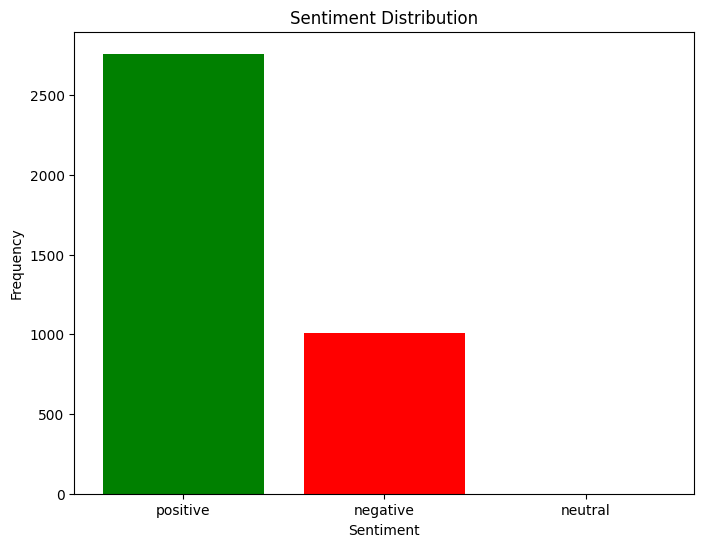

In [58]:
import matplotlib.pyplot as plt

sentiments = df['sentiment']

# Count the occurrences of each sentiment
sentiment_counts = sentiments.value_counts()
sentiment_counts

# Plot the sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


In [59]:
sentiment_counts

sentiment
positive    2759
negative    1006
neutral        1
Name: count, dtype: int64

In [60]:
df.columns

Index(['review', 'sentiment', 'id'], dtype='object')

In [61]:
df.to_csv('output.csv', index=False)

In [62]:
!pip install azure-storage-blob

In [63]:
from azure.storage.blob import BlobServiceClient

# Define your Azure Blob Storage account details
azure_storage_connection_string = "DefaultEndpointsProtocol=https;AccountName=purvisentimentalanalysis;AccountKey=TQWi1zNtR481tctfF/KaNsRwrJ5uzgvsV8piD97exTB3PlxfSnpTIWuVS/yeaQYJmQ380A3Da/oG+AStaetqhQ==;EndpointSuffix=core.windows.net"
container_name = "purvisentimentalanalysis" # conatiner Name in azure
blob_name = "outputsentimental.csv"  # Name of the file to store sentiment analysis results

# Connect to Azure Blob Storage account
blob_service_client = BlobServiceClient.from_connection_string(azure_storage_connection_string)

container_client = blob_service_client.get_container_client(container_name)
blob_client = container_client.get_blob_client(blob_name)

with open("output.csv", "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

print("CSV file uploaded to Azure Blob Storage.")

CSV file uploaded to Azure Blob Storage.
